<a href="https://colab.research.google.com/github/hasanemre11/python/blob/main/Boston_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston House Price Prediction Project

**Author:** Hasan Emre Yıldız 
**Date:** September 2024

**Description:** A project on predicting Boston house prices using machine learning models.


##Introduction

In this project, we analyze the Boston housing market using the 'Boston House Price Data' dataset. The goal is to predict house prices based on various features such as crime rate, proportion of residential land, and average number of rooms. The analysis involves preprocessing the data, applying feature transformations, and training multiple machine learning models to assess their performance. Specifically, we use Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor, and XGBoost Regressor to evaluate their effectiveness in predicting house prices. We also perform hyperparameter tuning to optimize the models and compare their performance through various metrics including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE). The dataset can be accessed [here](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data).

###Attribute Information

**Input features:**

1.   CRIM: per capita crime rate by town
2.   ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3.   INDUS: proportion of non-retail business acres per town
4.   CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5.   NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6.   RM: average number of rooms per dwelling
7.   AGE: proportion of owner-occupied units built prior to 1940
8.   DIS: weighted distances to five Boston employment centres
9.  RAD: index of accessibility to radial highways
10.   TAX: full-value property-tax rate per $10,000 (10k dollars)

11.   PTRATIO: pupil-teacher ratio by town

12.   B: The result of the equation B=1000(Bk - 0.63)^2 where Bk  is the proportion of blacks by town
13.   LSTAT: % lower status of the population

**Output variable:**

1.   MEDV: Median value of owner-occupied homes in $1000's [1k dollars]

Source
StatLib - Carnegie Mellon University

##Data Exploration and Preprocessing

### 1. Data Overview and Cleaning:

In [1]:
from google.colab import userdata
import os
import pandas as pd
import numpy as np

os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

!kaggle datasets download -d fedesoriano/the-boston-houseprice-data -p /content

# Unzip the downloaded file
!unzip /content/the-boston-houseprice-data.zip -d /content

data = pd.read_csv('/content/boston.csv')
data.head()


Dataset URL: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data
License(s): copyright-authors
  0% 0.00/12.3k [00:00<?, ?B/s]
100% 12.3k/12.3k [00:00<00:00, 19.7MB/s]
Archive:  /content/the-boston-houseprice-data.zip
  inflating: /content/boston.csv     


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [30]:
# Get summary statistics
data.describe()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CRIM_Log
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.813418
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,1.022731
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.006300
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.078853
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.228336
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,1.542674
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,4.499545


In [31]:
#Check duplicates
data.duplicated().sum()

0

### 2. Data Visualization

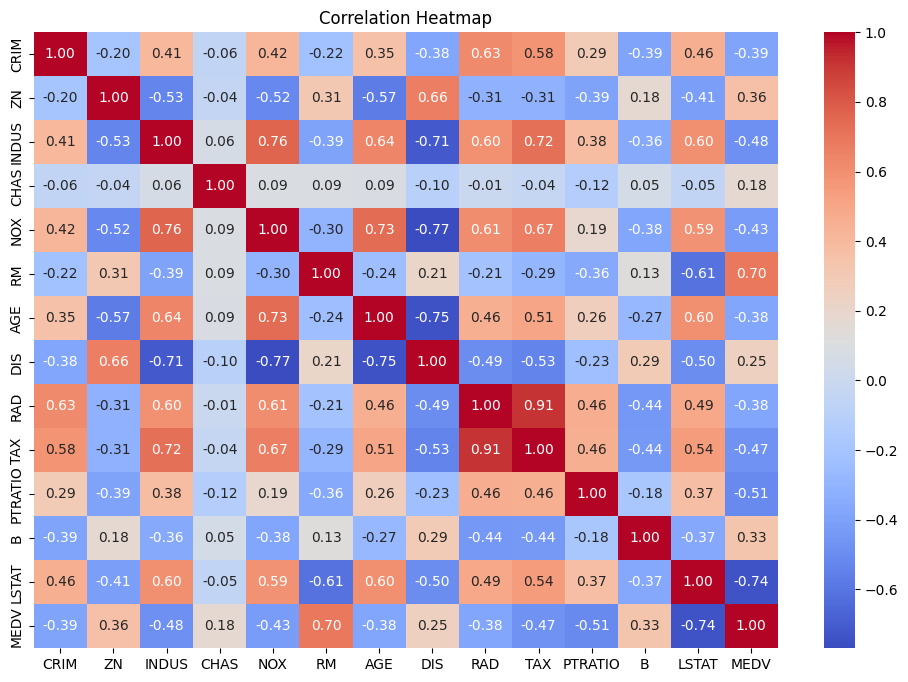

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


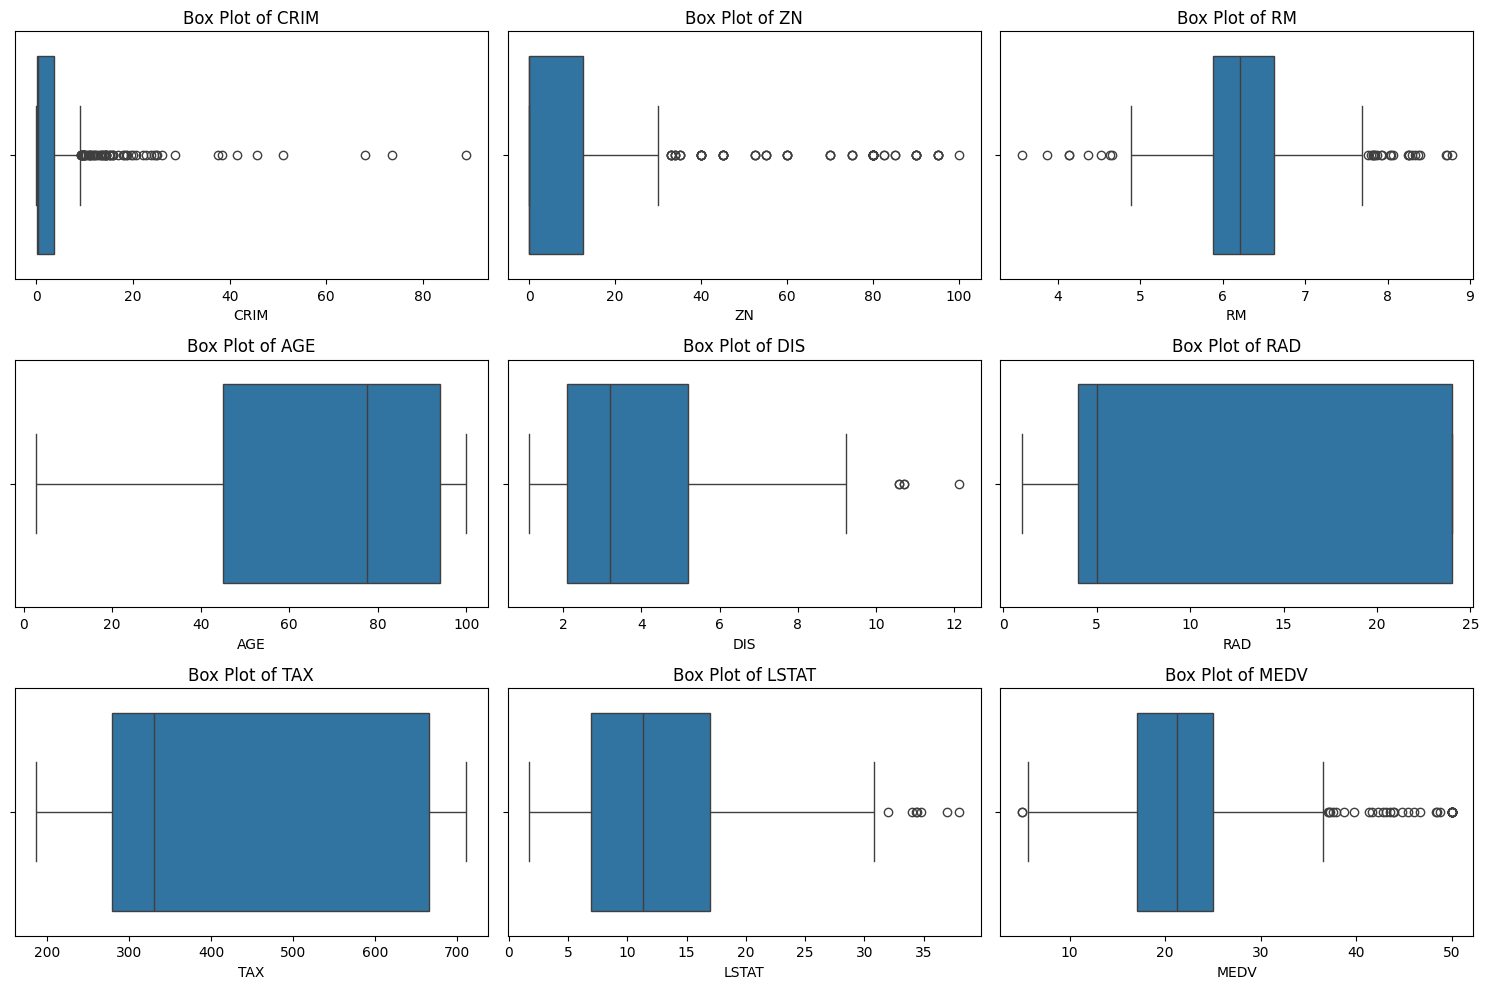

In [5]:
# List of features to plot
features = ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT', 'MEDV']

# Plotting box plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()


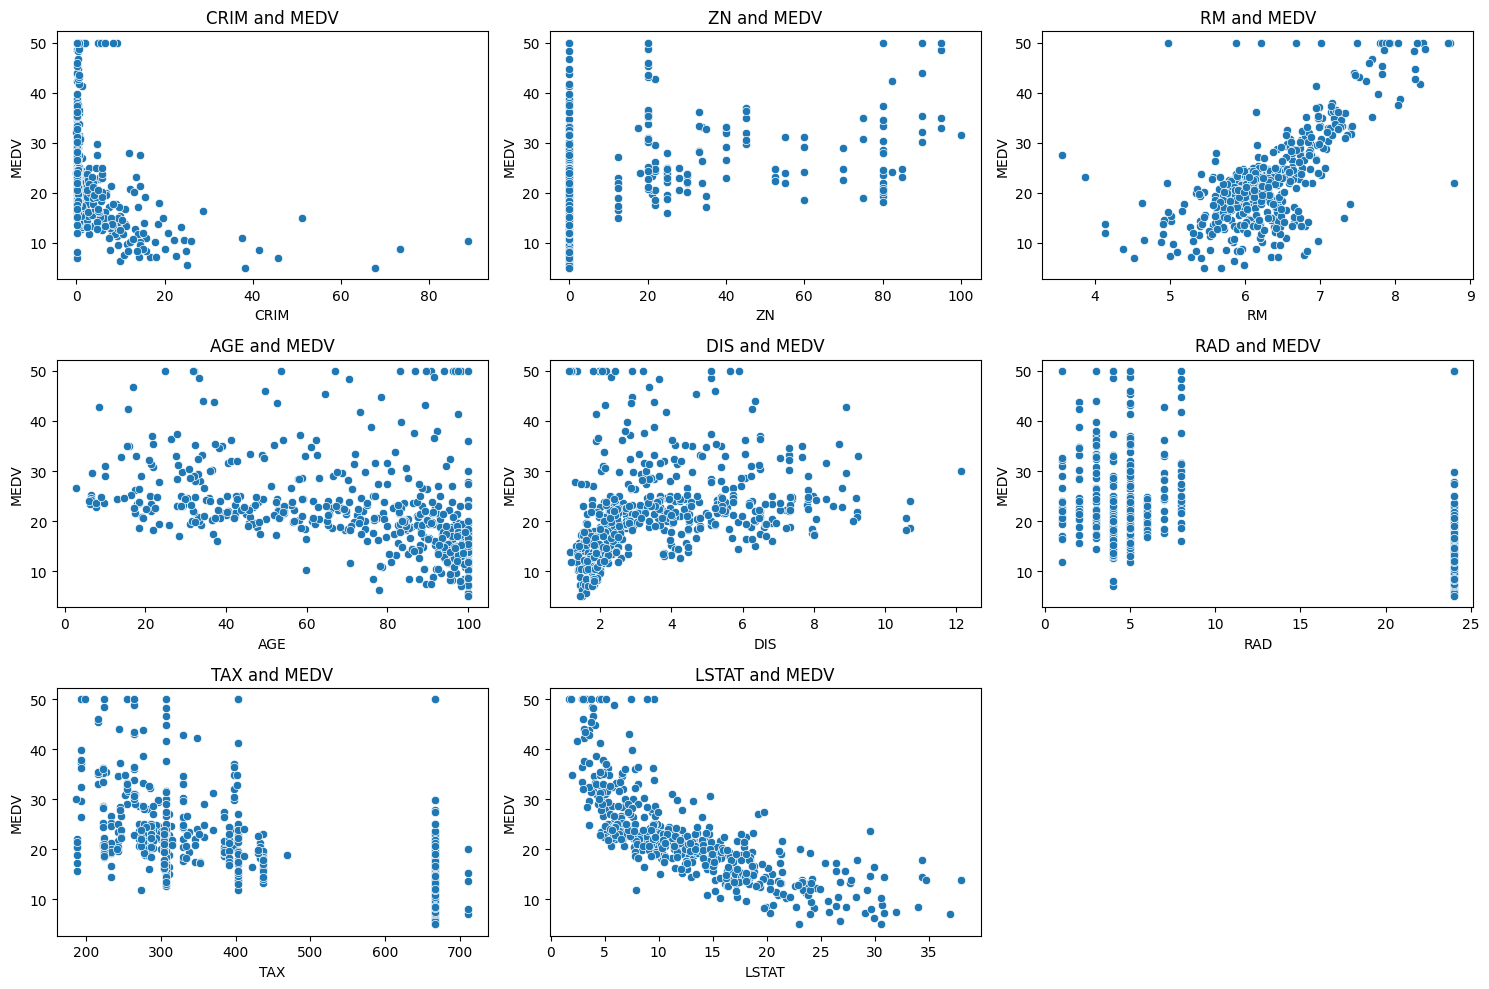

In [6]:
# Scatter plots for selected features vs MEDV
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features[:-1]):  # Exclude MEDV for this plot
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=data[feature], y=data['MEDV'])
    plt.title(f'{feature} and MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')

plt.tight_layout()
plt.show()


##Machine Learning Applications

###Splitting Data

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model_performance(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")



# Define features and target variable
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = 'MEDV'

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Model Training and Evaluation

In [48]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


# Initialize the models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=500, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100),
    'XGBoost': XGBRegressor()
}

# Cross-validation settings
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store the results
results = {}

# Custom scoring metrics
scoring_metrics = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'R2': make_scorer(r2_score)
}

# Evaluate each model using cross-validation
for name, model in models.items():
    print(f"Evaluating {name}...")
    model_results = {}
    for metric_name, scorer in scoring_metrics.items():
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer)
        model_results[metric_name] = np.mean(scores)
        print(f"{name} {metric_name}: {np.mean(scores):.2f} ± {np.std(scores):.2f}")
    results[name] = model_results
    print("\n")

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

Evaluating Decision Tree...
Decision Tree MAE: 3.33 ± 0.24
Decision Tree MSE: 30.53 ± 8.37
Decision Tree R2: 0.62 ± 0.15


Evaluating Random Forest...
Random Forest MAE: 2.39 ± 0.23
Random Forest MSE: 14.37 ± 4.55
Random Forest R2: 0.83 ± 0.05


Evaluating Gradient Boosting...
Gradient Boosting MAE: 2.28 ± 0.28
Gradient Boosting MSE: 13.14 ± 4.91
Gradient Boosting R2: 0.85 ± 0.05


Evaluating XGBoost...
XGBoost MAE: 2.38 ± 0.10
XGBoost MSE: 13.01 ± 2.73
XGBoost R2: 0.85 ± 0.03


                        MAE        MSE        R2
Decision Tree      3.327731  30.529052  0.621675
Random Forest      2.385419  14.366380  0.829888
Gradient Boosting  2.279353  13.137494  0.847120
XGBoost            2.376545  13.012282  0.846927


###Visualizing Model Predictions: Actual vs Predicted Values

Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


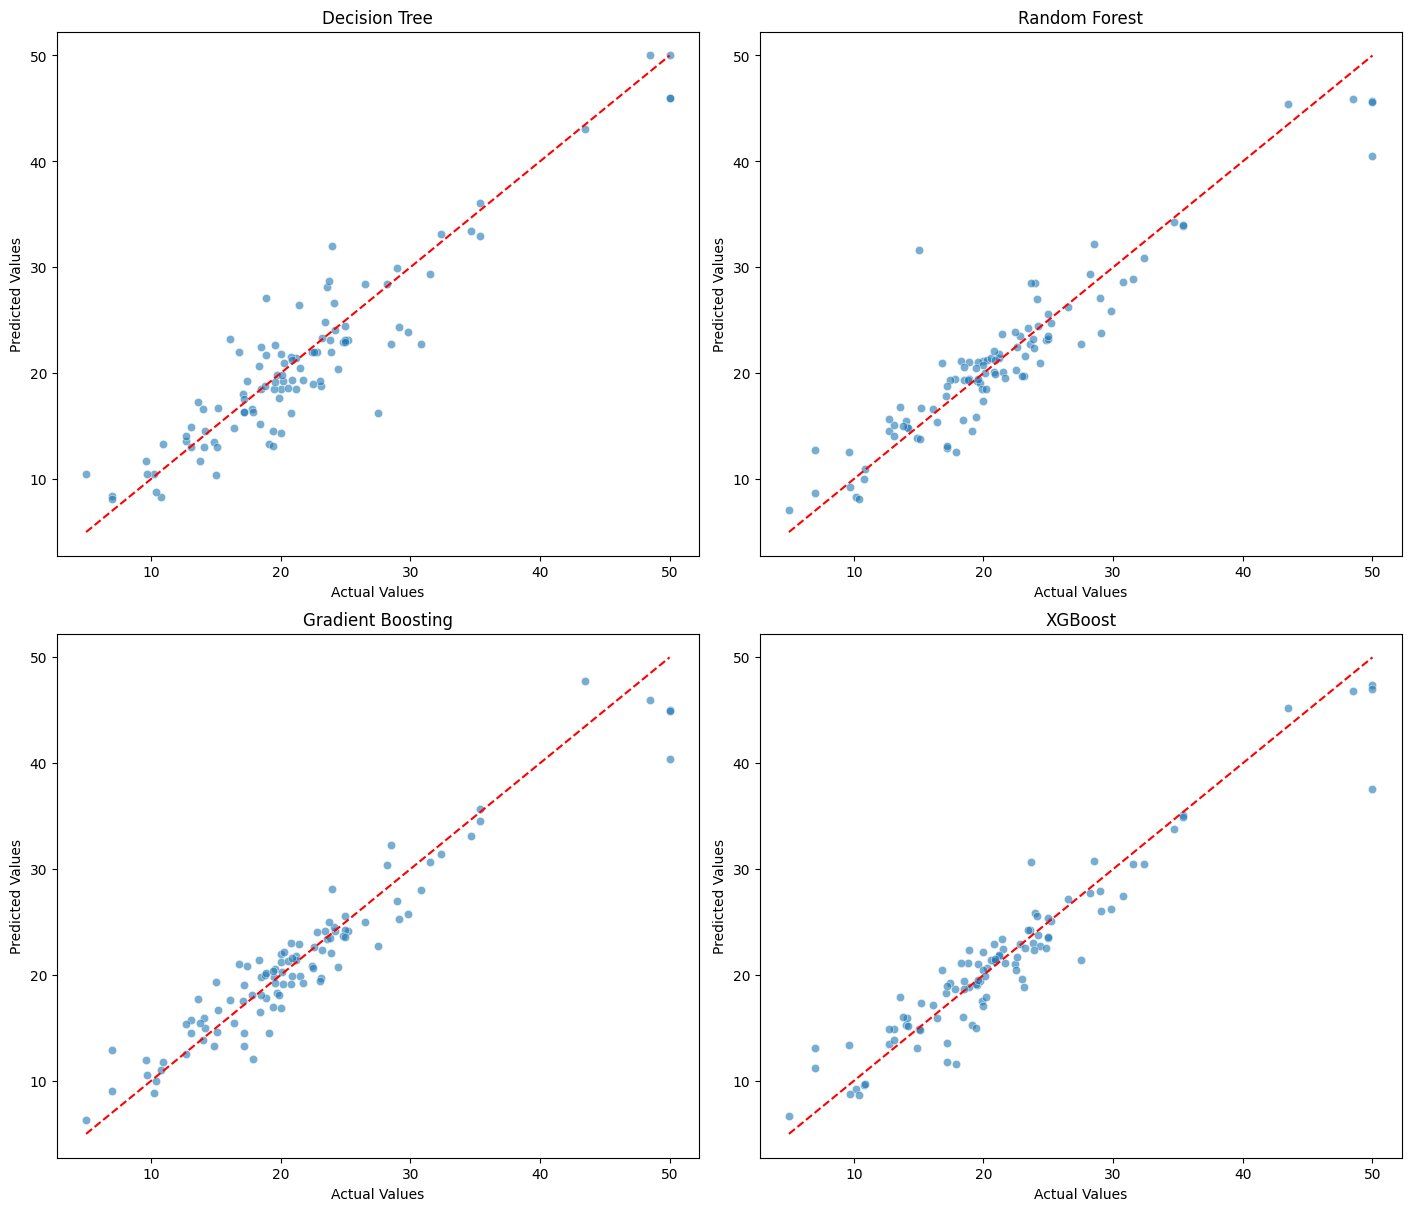

In [49]:
# Function to plot actual vs predicted values
def plot_actual_vs_predicted(y_true, y_pred, model_name, ax):
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, ax=ax)
    sns.lineplot(x=[min(y_true), max(y_true)], y=[min(y_true), max(y_true)], color='red', linestyle='--', ax=ax)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(f'{model_name}')

# Set up the matplotlib figure with a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Train each model, make predictions, and plot the results side by side
for ax, (name, model) in zip(axes, models.items()):
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Plot actual vs predicted values on the corresponding subplot
    plot_actual_vs_predicted(y_test, y_pred, name, ax)

# Show the plots
plt.show()

###Outliers Detecting



*   Detecting outliers for MEDV values.



In [50]:
y = pd.Series(y)

# Calculate Q1 (25th percentile) and Q3 (80th percentile)
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.80)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outliers as any point outside 1.5 times the IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = y[(y < lower_bound) | (y > upper_bound)]

# Display the outliers
print("Outliers detected using the IQR method:")
print(outliers)

Outliers detected using the IQR method:
161    50.0
162    50.0
163    50.0
166    50.0
186    50.0
195    50.0
203    48.5
204    50.0
225    50.0
228    46.7
233    48.3
257    50.0
262    48.8
267    50.0
280    45.4
282    46.0
283    50.0
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
Name: MEDV, dtype: float64


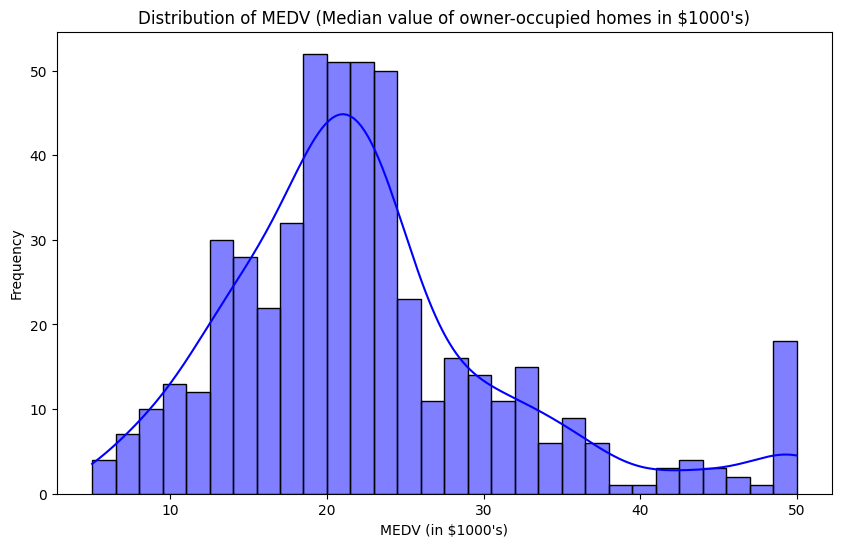

In [51]:
# Plot the distribution of MEDV
plt.figure(figsize=(10, 6))

# Histogram and KDE plot
sns.histplot(y, bins=30, kde=True, color='blue')

# Plot settings
plt.title('Distribution of MEDV (Median value of owner-occupied homes in $1000\'s)')
plt.xlabel('MEDV (in $1000\'s)')
plt.ylabel('Frequency')
plt.show()


We have observed that there are many MEDV values capped at 50.0, indicating a potential upper limit imposed on the data. These values may not be reliable as they do not accurately represent the true distribution of house prices above this threshold. To improve the quality of our analysis, we will remove these 50 values before proceeding with model training.

###Model Training and Evaluation After Outlier Removal

In [52]:
# Filter out outliers
mask = (y <50)
X_clean = X[mask]
y_clean = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

print(f"Original data shape: X: {X.shape}, y: {y.shape}")
print(f"X: {X_clean.shape}, y: {y_clean.shape}")

# Evaluate each model using cross-validation
for name, model in models.items():
    print(f"Evaluating {name}...")
    model_results = {}
    for metric_name, scorer in scoring_metrics.items():
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer)
        model_results[metric_name] = np.mean(scores)
        print(f"{name} {metric_name}: {np.mean(scores):.2f} ± {np.std(scores):.2f}")
    results[name] = model_results
    print("\n")

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

Original data shape: X: (506, 13), y: (506,)
X: (490, 13), y: (490,)
Evaluating Decision Tree...
Decision Tree MAE: 2.99 ± 0.32
Decision Tree MSE: 16.87 ± 2.96
Decision Tree R2: 0.73 ± 0.03


Evaluating Random Forest...
Random Forest MAE: 2.19 ± 0.28
Random Forest MSE: 9.89 ± 3.34
Random Forest R2: 0.85 ± 0.03


Evaluating Gradient Boosting...
Gradient Boosting MAE: 2.07 ± 0.25
Gradient Boosting MSE: 9.02 ± 2.44
Gradient Boosting R2: 0.86 ± 0.02


Evaluating XGBoost...
XGBoost MAE: 2.16 ± 0.27
XGBoost MSE: 9.32 ± 2.32
XGBoost R2: 0.86 ± 0.02


                        MAE        MSE        R2
Decision Tree      2.994018  16.872343  0.733940
Random Forest      2.193247   9.893810  0.847783
Gradient Boosting  2.067855   9.022333  0.860303
XGBoost            2.162362   9.321318  0.855140


###Hyperparameter Tuning



*   Decision Tree



In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Use mean squared error as the scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_regressor,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters for Decision Tree Regressor:", best_params)
print("Best MSE Score (negative):", best_score)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits
Best Parameters for Decision Tree Regressor: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 20}
Best MSE Score (negative): -14.09024561855963


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
560 fits failed out of a total of 2240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti



*   Random Forest Regressor



In [40]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model to find the best parameters
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest: ", best_params_rf)
print("Best Score for Random Forest: ", best_score_rf)


Fitting 5 folds for each of 540 candidates, totalling 2700 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters for Random Forest:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score for Random Forest:  -8.313106753846146




*   Gradient Boosting Regressor



In [41]:
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid,
                              cv=5, scoring='neg_root_mean_squared_error',
                              verbose=2, n_jobs=-1)

# Fit the GridSearchCV
print("Tuning Gradient Boosting...")
gb_grid_search.fit(X_train, y_train)

# Output the best hyperparameters and RMSE score
print("Best Hyperparameters for Gradient Boosting:", gb_grid_search.best_params_)
print("Best RMSE for Gradient Boosting:", -gb_grid_search.best_score_)


Tuning Gradient Boosting...
Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10800 fits failed out of a total of 32400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklear

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 0.8}
Best RMSE for Gradient Boosting: 2.542741820375899




*   XGB Regressor



In [42]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Initialize the XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Hyperparameters for XGBoost Regressor:", grid_search.best_params_)
print("Best RMSE for XGBoost Regressor:", np.sqrt(-grid_search.best_score_))


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters for XGBoost Regressor: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 0.7}
Best RMSE for XGBoost Regressor: 2.712820667203478


###Model Training and Evaluation After Hyperparameter Tuning

In [53]:


# Models with adjusted hyperparameters
new_models = {
    'Decision Tree': DecisionTreeRegressor(
        max_depth= 15,
        max_features=None,
        min_samples_leaf =1,
        min_samples_split=10,
        random_state=42
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=300,
        max_depth=30,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        max_features='sqrt',
        min_samples_split=10,
        min_samples_leaf=1,
        subsample=0.8,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=5,
        subsample=0.7,
        colsample_bytree=1.0,
        gamma=0,
        reg_alpha=0,
        reg_lambda=1,
        random_state=42
    )
}


# Evaluate each model using cross-validation
for name, model in new_models.items():
    print(f"Evaluating {name}...")
    model_results = {}
    for metric_name, scorer in scoring_metrics.items():
        scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer)
        model_results[metric_name] = np.mean(scores)
        print(f"{name} {metric_name}: {np.mean(scores):.2f} ± {np.std(scores):.2f}")
    results[name] = model_results
    print("\n")

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

Evaluating Decision Tree...
Decision Tree MAE: 2.76 ± 0.27
Decision Tree MSE: 14.75 ± 2.74
Decision Tree R2: 0.77 ± 0.02


Evaluating Random Forest...
Random Forest MAE: 2.09 ± 0.21
Random Forest MSE: 8.74 ± 2.20
Random Forest R2: 0.86 ± 0.02


Evaluating Gradient Boosting...
Gradient Boosting MAE: 1.95 ± 0.21
Gradient Boosting MSE: 7.72 ± 2.03
Gradient Boosting R2: 0.88 ± 0.02


Evaluating XGBoost...
XGBoost MAE: 1.92 ± 0.25
XGBoost MSE: 8.68 ± 2.86
XGBoost R2: 0.87 ± 0.03


                        MAE        MSE        R2
Decision Tree      2.756706  14.745788  0.768832
Random Forest      2.093949   8.738681  0.863443
Gradient Boosting  1.946096   7.724474  0.879407
XGBoost            1.921038   8.675181  0.866337


##**Final Analysis**

This report documents the iterative process of improving machine learning models for predicting Boston house prices. Starting with baseline models, we focused on enhancing performance through strategic outlier removal and hyperparameter tuning. These steps resulted in significant improvements in model accuracy, as evidenced by reduced errors and higher R² scores.

## **Step 1: Initial Model Evaluation**
We began by training four machine learning models:
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- XGBoost Regressor

These models were initially evaluated on the complete dataset without any filtering or tuning.

**Initial Results:**
- **Decision Tree**: MAE: `3.330`, MSE: `30.530`, R²: `0.622`
- **Random Forest**: MAE: `2.390`, MSE: `14.370`, R²: `0.830`
- **Gradient Boosting**: MAE: `2.280`, MSE: `13.140`, R²: `0.847`
- **XGBoost**: MAE: `2.380`, MSE: `13.010`, R²: `0.847`

While Gradient Boosting and XGBoost showed promise, there was room for improvement, particularly in reducing model errors and improving the R² values.

## **Step 2: Outlier Removal**
A significant portion of the dataset had house prices (`MEDV`) capped at 50, which distorted the distribution. These were identified as outliers likely resulting from an upper limit imposed during data collection. Removing these 50 values helped reduce noise and enabled the models to better capture the underlying patterns in the data.

**Results After Outlier Removal:**
- **Decision Tree**: MAE: `2.994`, MSE: `16.872`, R²: `0.734`
- **Random Forest**: MAE: `2.193`, MSE: `9.894`, R²: `0.848`
- **Gradient Boosting**: MAE: `2.068`, MSE: `9.022`, R²: `0.860`
- **XGBoost**: MAE: `2.162`, MSE: `9.321`, R²: `0.855`

**Impact of Outlier Removal**:
- **Improved Accuracy**: All models showed a substantial reduction in Mean Absolute Error (MAE) and Mean Squared Error (MSE) after outlier removal.
- **Higher R² Scores**: The R² values increased across all models, indicating a better fit to the data.
- **Better Generalization**: Outlier removal particularly benefitted models like Decision Tree and Random Forest, which are more prone to overfitting noisy data.

## **Step 3: Hyperparameter Tuning**
With a cleaner dataset, the next step was to fine-tune the models' hyperparameters using GridSearchCV. This process involved exploring a range of values for parameters such as `max_depth`, `n_estimators`, `learning_rate`, and others specific to each algorithm.

**Results After Hyperparameter Tuning:**
- **Decision Tree**:
  - Best Parameters: `max_depth=15`, `min_samples_split=10`, `min_samples_leaf=1`
  - Improved Performance: MAE: `2.757`, MSE: `14.746`, R²: `0.769`
  - **Key Improvements**: Reduced overfitting by controlling tree depth and node size, leading to better generalization.

- **Random Forest**:
  - Best Parameters: `n_estimators=300`, `max_depth=30`, `max_features='sqrt'`
  - Improved Performance: MAE: `2.094`, MSE: `8.739`, R²: `0.863`
  - **Key Improvements**: Enhanced accuracy by increasing the number of trees and optimizing the number of features considered at each split.

- **Gradient Boosting**:
  - Best Parameters: `n_estimators=300`, `learning_rate=0.05`, `max_depth=5`, `subsample=0.8`
  - Improved Performance: MAE: `1.946`, MSE: `7.724`, R²: `0.879`
  - **Key Improvements**: Fine-tuned learning rate and depth, balancing bias and variance for a more robust model.

- **XGBoost**:
  - Best Parameters: `n_estimators=300`, `learning_rate=0.05`, `max_depth=5`, `min_child_weight=5`, `subsample=0.7`
  - Improved Performance: MAE: `1.921`, MSE: `8.675`, R²: `0.866`
  - **Key Improvements**: Adjusted regularization parameters (`min_child_weight`, `subsample`) to control overfitting and improve accuracy.

**Impact of Hyperparameter Tuning**:
- **Significant Error Reduction**: All models experienced a further drop in MAE and MSE after tuning, indicating more precise predictions.
- **Maximized R² Scores**: Gradient Boosting achieved an R² of `0.879`, and XGBoost closely followed with `0.866`, indicating that the models now explain most of the variance in the target variable.

## **Conclusion**
The project demonstrated a structured approach to model improvement. By first removing outliers and then applying hyperparameter tuning, we were able to significantly enhance the performance of all models:
- **Outlier Removal** was the key initial step that helped stabilize model training and improve baseline performance.
- **Hyperparameter Tuning** further refined the models, leading to optimal performance, especially for Gradient Boosting and XGBoost, which now provide highly accurate predictions with minimal errors.